####  PART I:


#### EDA & Data Preprocessing on Google App Store Rating Dataset.
#### Domain: Mobile device apps

#### 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [2]:
apps=pd.read_csv('Apps_data+(1).csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [3]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apps.shape

(10841, 13)

In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [7]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
# #The columns that need to be worked upon for model building
print("1. Rating")
print("2. Type")
print("3. Content Rating")
print("4. Price")
print("5. Category")
print("6. Reviews")

1. Rating
2. Type
3. Content Rating
4. Price
5. Category
6. Reviews


#### 4. Check if there are any duplicate records in the dataset? if any drop them.


In [9]:
apps.duplicated().sum()

483

In [10]:
apps.drop_duplicates(inplace=True)

In [11]:
apps.duplicated().sum()

0

#### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [12]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
apps['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [14]:
apps['Category']=apps['Category'].replace('1.9',np.nan)

In [15]:
apps.dropna(subset='Category',inplace=True)

In [16]:
apps['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

#### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [17]:
apps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [18]:
apps.dropna(inplace=True)

In [19]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
apps['Rating_category']=np.where(apps['Rating']>3.5,'high','low')
apps['Rating_category']

0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 8886, dtype: object

#### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution

In [21]:
apps['Rating_category'].value_counts()

high    8007
low      879
Name: Rating_category, dtype: int64

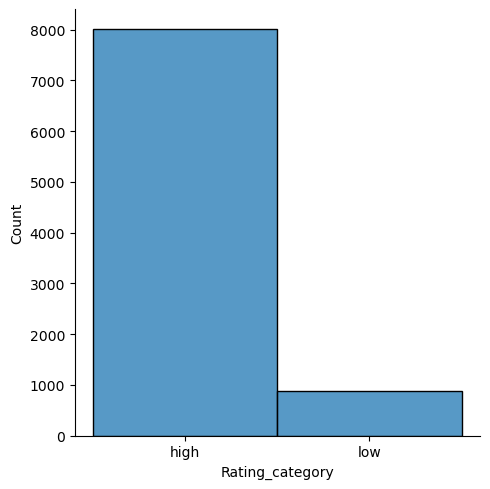

In [22]:
sns.displot(apps['Rating_category'])
plt.show()

#### Observation:
1) Most Number of ratings which got on Google Play Store is given for free apps.
2) From the above plot, we can say that the maximum number of people given above 3.5 rating in                         Google Play apps.

#### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [23]:
apps['Reviews']=apps['Reviews'].astype(float)
apps['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10834         7.0
10836        38.0
10837         4.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 8886, dtype: float64

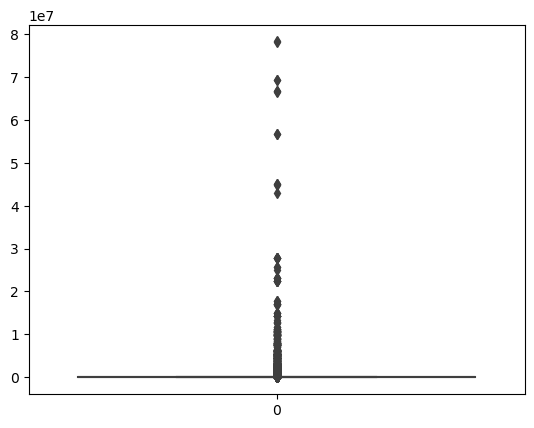

In [24]:
sns.boxplot(apps['Reviews'])
plt.show()

In [25]:
apps['Reviews']=np.log(apps['Reviews'])
apps['Reviews']

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10834     1.945910
10836     3.637586
10837     1.386294
10839     4.736198
10840    12.894978
Name: Reviews, Length: 8886, dtype: float64

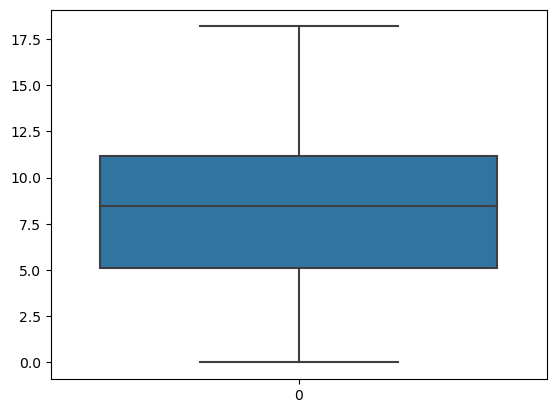

In [26]:
sns.boxplot(apps['Reviews'])
plt.show()

#### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [27]:
apps['Size'].value_counts()

Varies with device    1468
14M                    153
13M                    152
12M                    151
15M                    149
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [28]:
apps['Size']=apps['Size'].replace('Varies with device',np.nan)
apps['Size']=apps['Size'].replace({'M':'e6','k':'e3'},regex=True).astype(float)

In [29]:
apps.dropna(subset='Size',inplace=True)

In [30]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.784190,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,high
10834,FR Calculator,FAMILY,4.0,1.945910,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,3.637586,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.386294,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high


#### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [31]:
apps['Installs'].value_counts()

1,000,000+        1229
100,000+          1003
10,000+            948
10,000,000+        762
1,000+             674
5,000,000+         493
500,000+           470
50,000+            431
5,000+             413
100+               297
500+               195
100,000,000+       192
50,000,000+        144
10+                 67
50+                 56
500,000,000+        24
5+                   9
1,000,000,000+       8
1+                   3
Name: Installs, dtype: int64

In [32]:
apps['Installs']=apps['Installs'].str.replace(',','').str.replace('+','').astype(int)
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.784190,619000.0,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,high
10834,FR Calculator,FAMILY,4.0,1.945910,2600000.0,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,3.637586,53000000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.386294,3600000.0,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high


In [33]:
apps['Installs'].value_counts()

1000000       1229
100000        1003
10000          948
10000000       762
1000           674
5000000        493
500000         470
50000          431
5000           413
100            297
500            195
100000000      192
50000000       144
10              67
50              56
500000000       24
5                9
1000000000       8
1                3
Name: Installs, dtype: int64

#### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [34]:
apps['Price'].value_counts()

0          6873
$0.99       103
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [35]:
apps['Price']=apps['Price'].str.replace('$','').astype(float)

In [36]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.784190,619000.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,high
10834,FR Calculator,FAMILY,4.0,1.945910,2600000.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,3.637586,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.386294,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high


#### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [37]:
columns_to_drop = ['Rating', 'App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [38]:
apps = apps.drop(columns=columns_to_drop)


In [39]:
apps

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000,Free,0.0,Everyone,high
10834,FAMILY,1.945910,2600000.0,500,Free,0.0,Everyone,high
10836,FAMILY,3.637586,53000000.0,5000,Free,0.0,Everyone,high
10837,FAMILY,1.386294,3600000.0,100,Free,0.0,Everyone,high


#### Observation:
1) This column is redundant because you've already created a new feature, 'Rating Category,' from it, which is more suitable for your analysis.

2) This column is likely redundant for your analysis if it contains unique identifiers for each app. It doesn't provide valuable insights when analyzing the dataset as a whole.

#### 13. Encode the categorical columns.

In [40]:
le=LabelEncoder()
for i in apps.columns:
    if apps[i].dtype=='object':
        apps[i]=le.fit_transform(apps[i])


In [41]:
apps.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000.0,10000,0,0.0,1,0
1,0,6.874198,14000000.0,500000,0,0.0,1,0
2,0,11.379508,8700000.0,5000000,0,0.0,1,0
3,0,12.281384,25000000.0,50000000,0,0.0,4,0
4,0,6.874198,2800000.0,100000,0,0.0,1,0


#### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [42]:
x=apps.drop('Rating_category',axis=1)
y=apps[['Rating_category']]


In [43]:
apps.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000.0,10000,0,0.0,1,0
1,0,6.874198,14000000.0,500000,0,0.0,1,0
2,0,11.379508,8700000.0,5000000,0,0.0,1,0
3,0,12.281384,25000000.0,50000000,0,0.0,4,0
4,0,6.874198,2800000.0,100000,0,0.0,1,0


In [44]:
x.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,5.068904,19000000.0,10000,0,0.0,1
1,0,6.874198,14000000.0,500000,0,0.0,1
2,0,11.379508,8700000.0,5000000,0,0.0,1
3,0,12.281384,25000000.0,50000000,0,0.0,4
4,0,6.874198,2800000.0,100000,0,0.0,1


In [45]:
y.head()

,Rating_category
0,0
1,0
2,0
3,0
4,0


#### 15. Split the dataset into train and test.


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [47]:
x_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
4407,14,10.292315,69000000.0,1000000,0,0.0,1
5679,14,10.098725,25000000.0,500000,0,0.0,1
6119,11,1.098612,10000000.0,50,0,0.0,1
1564,18,6.398595,5100000.0,100000,0,0.0,1
8295,19,10.897369,5800000.0,5000000,0,0.0,4


In [48]:
x_test.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
2655,26,15.641832,15000000.0,100000000,0,0.0,1
9095,12,6.464588,3200000.0,10000,0,0.0,1
10229,27,4.682131,2800000.0,10000,0,0.0,4
3224,30,11.916542,4100000.0,10000000,0,0.0,1
6891,18,9.210940,53000000.0,1000000,0,0.0,1


#### 16. Standardize the data, so that the values are within a particular range.


In [49]:
scaler=StandardScaler()
apps=scaler.fit_transform(apps)

In [50]:
apps

array([[-2.03790984, -0.68006597, -0.16046114, ..., -0.06306511,
        -0.46344798, -0.35349977],
       [-2.03790984, -0.19675826, -0.37379329, ..., -0.06306511,
        -0.46344798, -0.35349977],
       [-2.03790984,  1.0093891 , -0.59992537, ..., -0.06306511,
        -0.46344798, -0.35349977],
       ...,
       [-0.68626047, -1.06325392,  1.29019747, ..., -0.06306511,
        -0.46344798, -0.35349977],
       [-0.68626047, -1.66596267, -0.81752416, ..., -0.06306511,
        -0.46344798, -0.35349977],
       [ 0.17388004,  1.41510596, -0.16046114, ..., -0.06306511,
        -0.46344798, -0.35349977]])

In [51]:
apps=pd.DataFrame(apps)
apps

,0,1,2,3,4,5,6,7
0,-2.037910,-0.680066,-0.160461,-0.168829,-0.281595,-0.063065,-0.463448,-0.3535
1,-2.037910,-0.196758,-0.373793,-0.158250,-0.281595,-0.063065,-0.463448,-0.3535
2,-2.037910,1.009389,-0.599925,-0.061099,-0.281595,-0.063065,-0.463448,-0.3535
3,-2.037910,1.250836,0.095537,0.910421,-0.281595,-0.063065,2.516492,-0.3535
4,-2.037910,-0.196758,-0.851657,-0.166886,-0.281595,-0.063065,-0.463448,-0.3535
...,...,...,...,...,...,...,...,...
7413,-1.669278,-1.024006,-0.944713,-0.169024,-0.281595,-0.063065,-0.463448,-0.3535
7414,-0.686260,-1.516144,-0.860191,-0.169034,-0.281595,-0.063065,-0.463448,-0.3535
7415,-0.686260,-1.063254,1.290197,-0.168937,-0.281595,-0.063065,-0.463448,-0.3535
7416,-0.686260,-1.665963,-0.817524,-0.169043,-0.281595,-0.063065,-0.463448,-0.3535


#### PART II:

#### Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.
#### Domain: Food and agriculture

#### 1. Import required libraries and read the dataset

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [53]:
food=pd.read_csv('honeyproduction.csv')
food

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [54]:
food.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [55]:
food.shape

(626, 8)

In [56]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [57]:
food.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [58]:
food.duplicated().sum()

0

In [59]:
food.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


#### 3. Display the percentage distribution of the data in each year using the pie chart

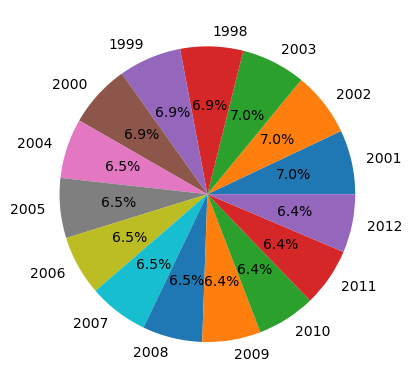

In [60]:
a=food['year'].value_counts()
years=['2001','2002','2003','1998','1999','2000','2004','2005','2006','2007','2008','2009','2010','2011','2012']
plt.pie(a,labels=years,autopct = '%.1f%%')
plt.show()

#### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


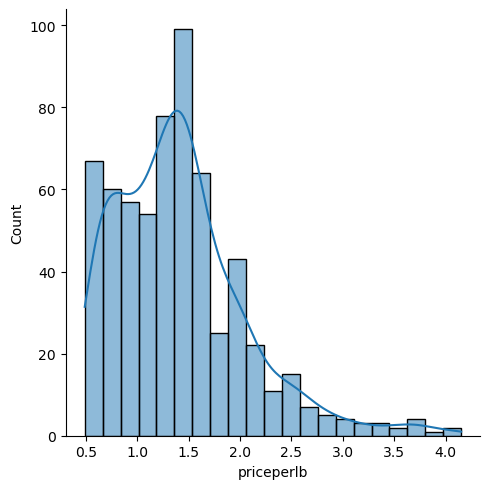

In [61]:
sns.displot(data=food,x='priceperlb',kde=True)
plt.show()

#### Observation:
1) 0.5 to 2.0 are most average price per pound based on expanded sales.
2) 2.0 to 4.0 are less average price per pound based on expanded sales.

#### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings

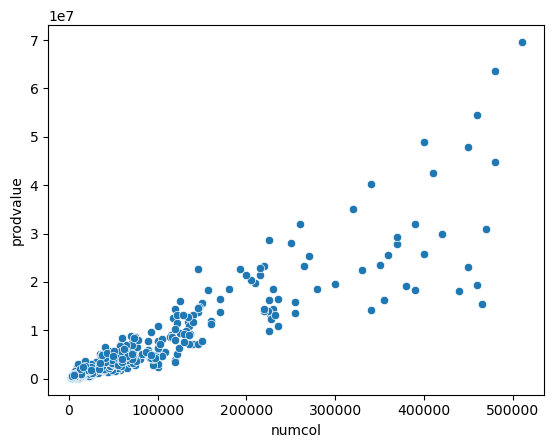

In [62]:
sns.scatterplot(data=food,x='numcol',y='prodvalue')
plt.show()

#### Observation:
1) Numcol & prodvalue are strong positive corration.
2) Number of honey producing colonies are increases,Value of production are also increases.
3) some outliers in the plot, indicating instances where a relatively small number of colonies generated a high production value.

#### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

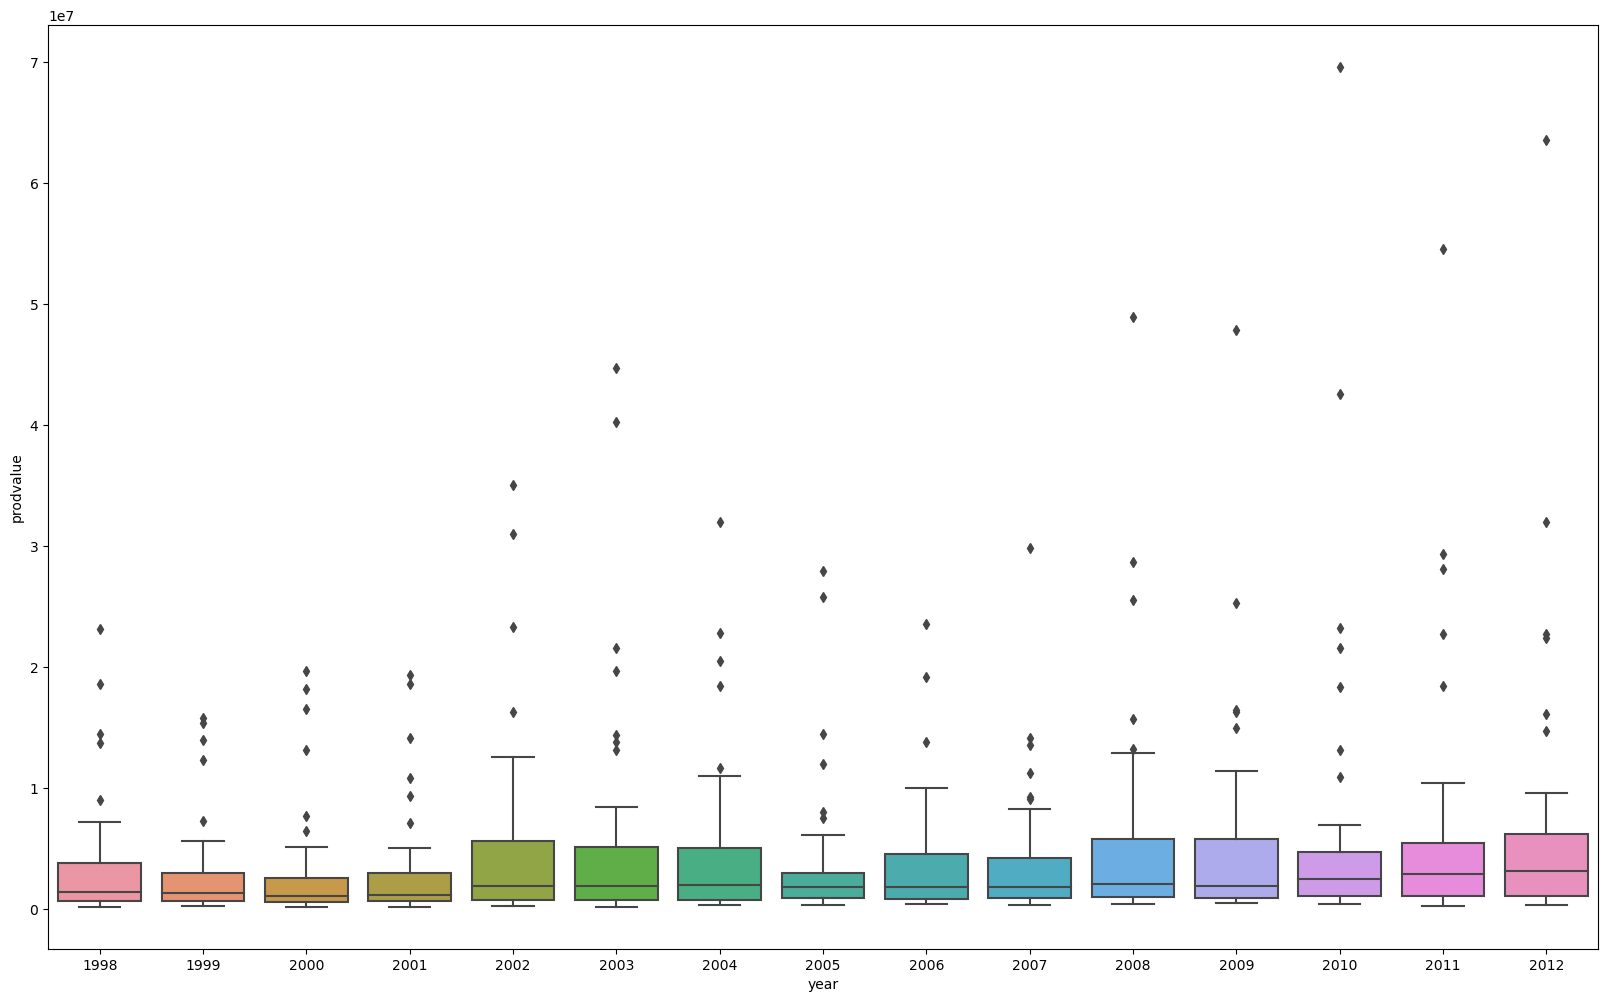

In [63]:
plt.figure(figsize=(20,12))
sns.boxplot(data=food,x='year',y='prodvalue')
plt.show()

#### Observation:
1) 2010,2011, and 2012 years are Most of the outliers of production values
2) If the medians or the boxes show a consistent upward or downward trend over the years, it suggests a general trend in production value over time. An increasing trend would indicate growth, while a decreasing trend might indicate a decline.

#### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

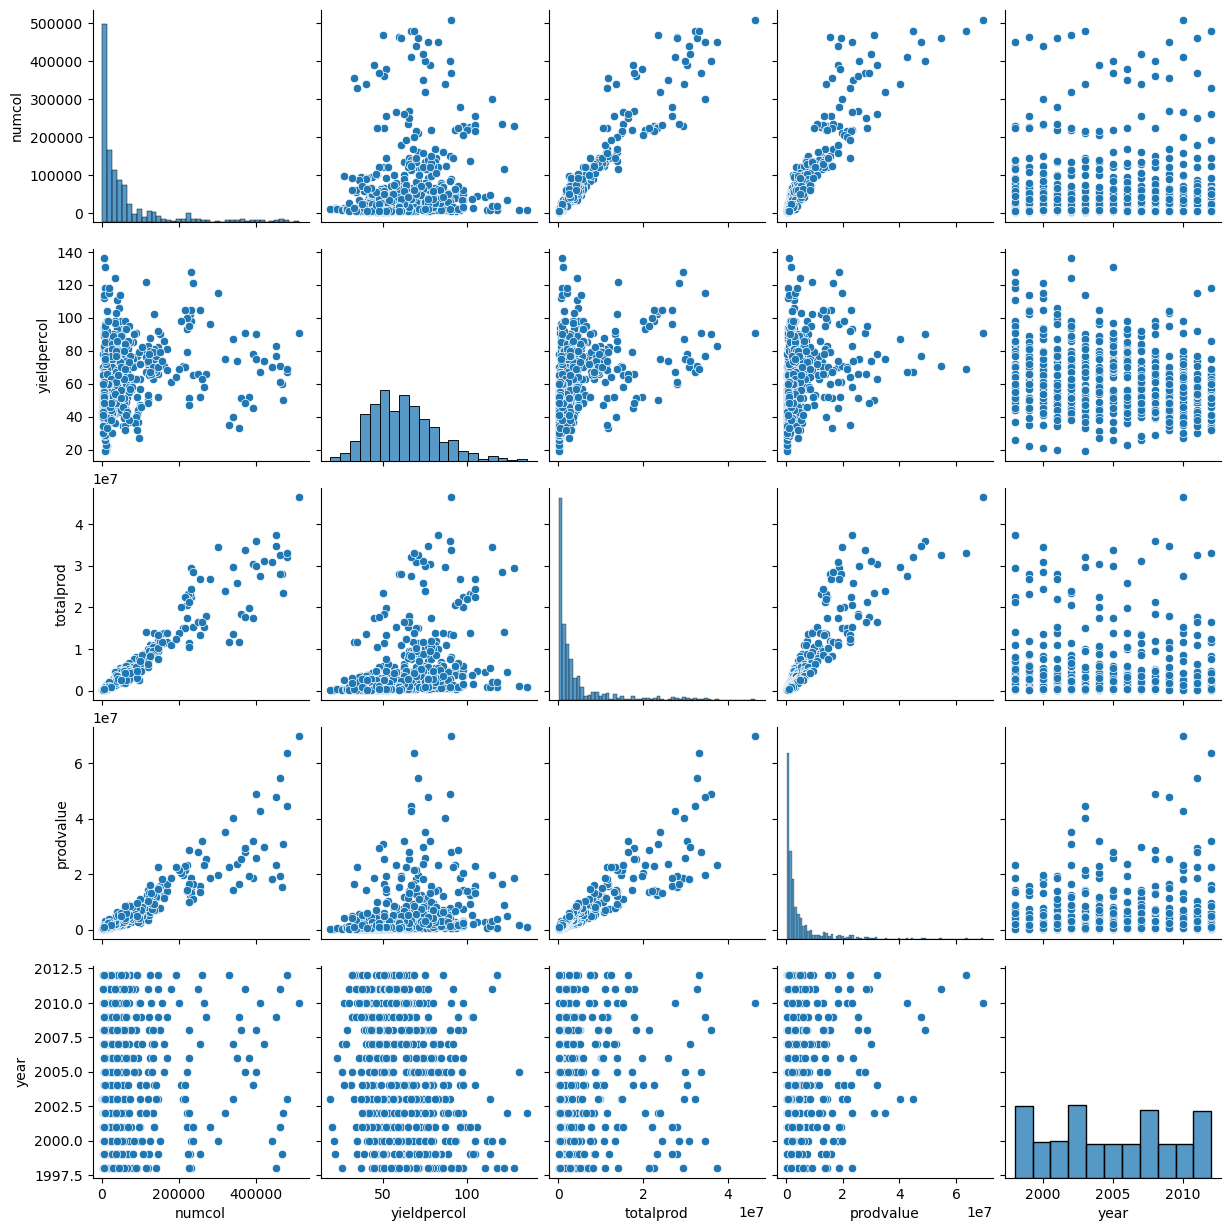

In [64]:
sns.pairplot(data=food[['numcol','yieldpercol','totalprod','prodvalue','year']])
plt.show()

#### Observation:
1) numcol is most corelated to totalprod and prodvalue with no corelated with yeidpercol.
2) There is a weak positive correlation between production value (prodvalue) and the year. Production value has shown a slight increase over the years.
3) There is a strong positive correlation between total production (totalprod) and production value (prodvalue). This indicates that higher total production is strongly associated with higher production value.

#### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol','total prod', 'stocks', 'price per lb', 'prodvalue')

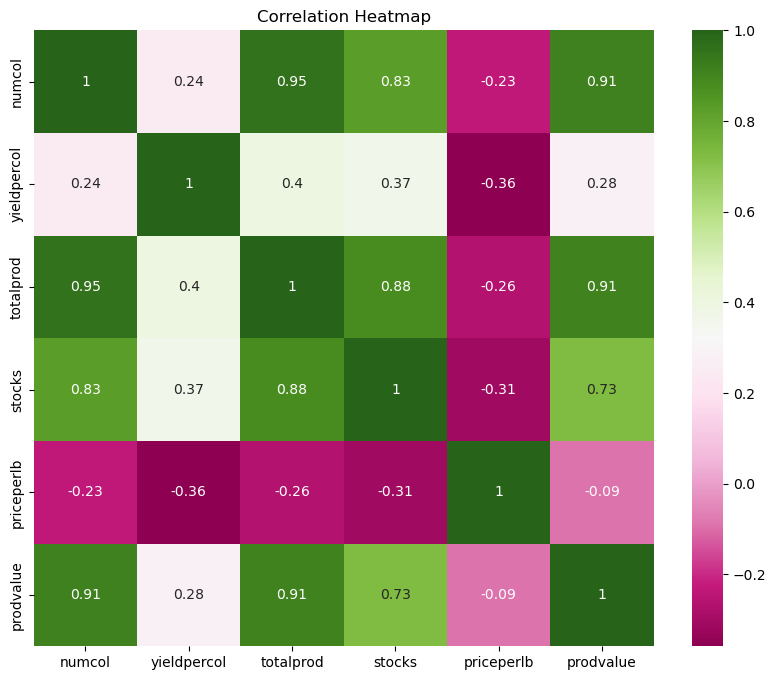

In [65]:
corr = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']
correlation= food[corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

#### Observation:
1) There is a weak positive correlation between production value (prodvalue) and the year. Production value has shown a slight increase over the years.
2) There is a strong positive correlation between stocks and production value. Higher stock levels are closely related to higher production values.
3) There is a moderate negative correlation between yield per colony (yieldpercol) and the price per pound (priceperlb). As yield per colony increases, the price per pound tends to decrease.